This notebook is an example analysis of the output data produced by the JET galaxy and black hole evolutionary code found at https://github.com/olmost/pp25 (presented in Piana & Pu 2025). We refer to the readme file in that repository for more information.

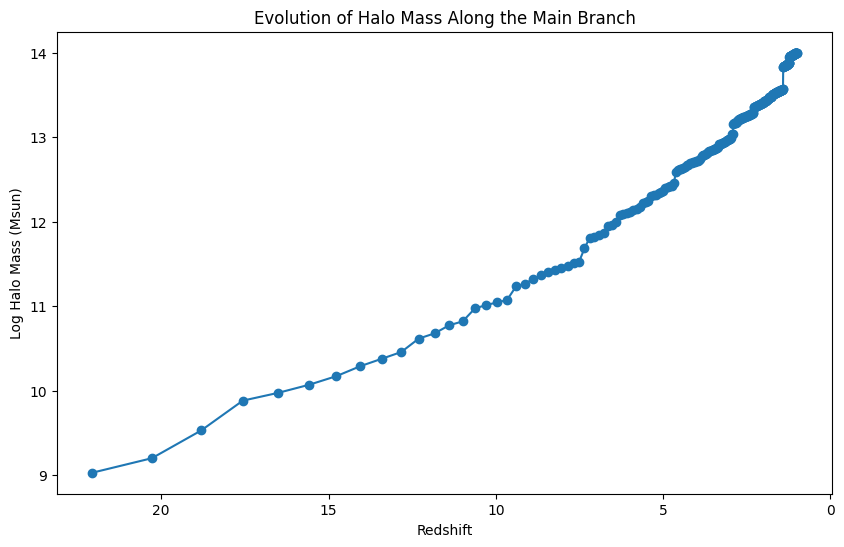

/home/olmost/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


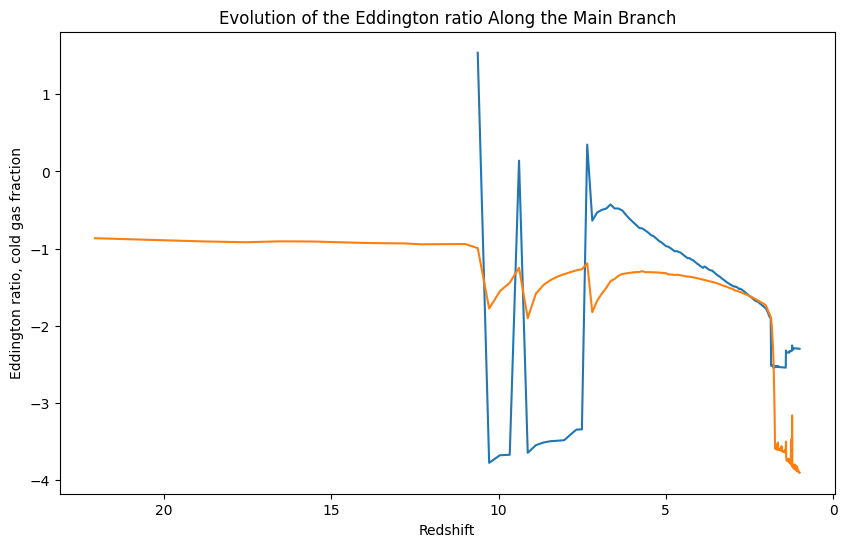

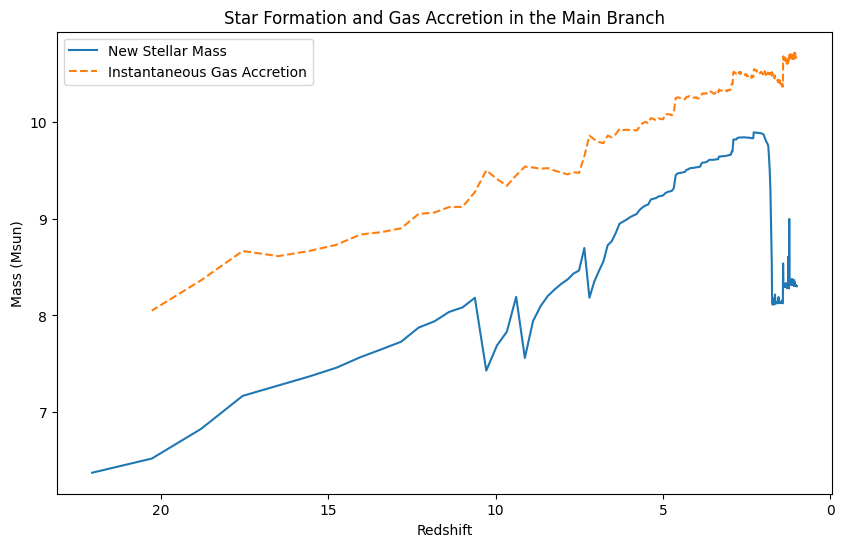

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]


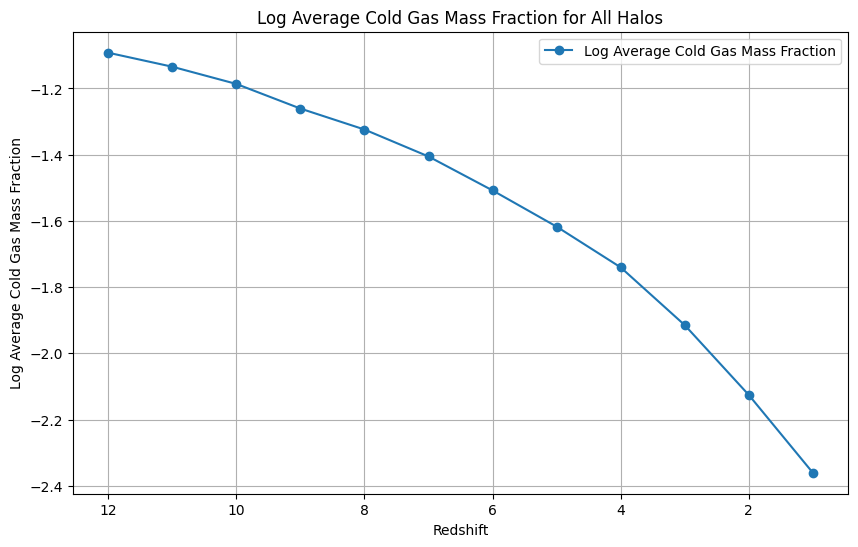

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the column names based on the README
column_names = [
    "redshift",
    "log_halo_mass",
    "smooth_accretion_fraction",
    "cumulative_gas_accretion",
    "instantaneous_gas_accretion",
    "total_stellar_mass",
    "new_stellar_mass",
    "num_progenitors",
    "cumulative_sn_ejection",
    "cumulative_agn_ejection",
    "bh_radiative_energy",
    "bh_mass",
    "halo_number_density",
    "eddington_ratio",
    "total_bh_gas_accretion",
    "bh_uv_energy",
    "instantaneous_sn_ejection",
    "instantaneous_agn_ejection",
    "cumulative_bondi_accretion",
    "instantaneous_bondi_accretion",
    "cold_gas_mass",
    "hot_gas_mass",
    "instantaneous_cooled_gas",
    "cumulative_cooled_gas",
    "jet_power",
    "instantaneous_heated_gas",
    "gas_reservoir_mass"
]

# --- 1. Load the Data ---
# Function to load data from a file
def load_data(filename):
    try:
        data = np.loadtxt(filename)
        df = pd.DataFrame(data, columns=column_names)
        return df
    except FileNotFoundError:
        print(f"Error: File not found - {filename}")
        return None

# Load the main branch data
main_branch_file = "pp25/main_branch_allgalaxies.dat"
main_branch_df = load_data(main_branch_file)
if main_branch_df is None:
    exit()  # Stop if the main branch data isn't found

# Load the snapshot data (example: the last phyprop file - replace with your desired file)
# Get a list of all phyprop files.
import glob
phyprop_files = glob.glob("pp25/phyprop_all_z4start_nofb_fstareff_mergertree_z*.dat")
#phyprop_files.sort()  # Sort the files
snapshot_dfs = []
for file in phyprop_files:
    df = load_data(file)
    snapshot_dfs.append(df)

# --- 2. Data Exploration and Preprocessing ---
# Print some info about the dataframes
#print("\nMain Branch Data:")
#print(main_branch_df.head())
#print(main_branch_df.info())

#print("\nSnapshot Data (last snapshot):")
#print(snapshot_df.head())
#print(snapshot_df.info())

# Check for missing values in the main branch data
#print("\nMissing values in main branch data:")
#print(main_branch_df.isnull().sum())

# Check for missing values in the snapshot data
#print("\nMissing values in snapshot data:")
#print(snapshot_df.isnull().sum())
# --- 3. Analysis and Visualization ---

# --- A. Halo Mass Evolution Along the Main Branch ---
plt.figure(figsize=(10, 6))
plt.plot(main_branch_df["redshift"], main_branch_df["log_halo_mass"], marker='o', linestyle='-')
plt.xlabel("Redshift")
plt.ylabel("Log Halo Mass (Msun)")
plt.title("Evolution of Halo Mass Along the Main Branch")
plt.gca().invert_xaxis()  # Higher redshift = earlier time
#plt.grid(True)
plt.show()

# --- A. Halo Mass Evolution Along the Main Branch ---
plt.figure(figsize=(10, 6))
plt.plot(main_branch_df["redshift"], np.log10(main_branch_df["eddington_ratio"]), linestyle='-')
plt.plot(main_branch_df["redshift"], np.log10(main_branch_df["cold_gas_mass"]/(main_branch_df["cold_gas_mass"]+main_branch_df["hot_gas_mass"]+main_branch_df["total_stellar_mass"]+main_branch_df["bh_mass"]+10.**main_branch_df["log_halo_mass"])), linestyle='-')
plt.xlabel("Redshift")
plt.ylabel("Eddington ratio, cold gas fraction")
plt.title("Evolution of the Eddington ratio Along the Main Branch")
plt.gca().invert_xaxis()  # Higher redshift = earlier time
#plt.grid(True)
plt.show()

# --- E. Star Formation and Gas Accretion in the Main Branch ---
plt.figure(figsize=(10, 6))
plt.plot(main_branch_df["redshift"], np.log10(main_branch_df["new_stellar_mass"]), label="New Stellar Mass", linestyle='-')
plt.plot(main_branch_df["redshift"], np.log10(main_branch_df["instantaneous_gas_accretion"]), label="Instantaneous Gas Accretion", linestyle='--')
plt.xlabel("Redshift")
plt.ylabel("Mass (Msun)")
plt.title("Star Formation and Gas Accretion in the Main Branch")
plt.legend()
plt.gca().invert_xaxis()
#plt.grid(True)
plt.show()

# --- K. Progenitor Analysis ---
# 1.  Identify Progenitors (including main branch)
progenitor_data = []  # Not used, but good to have

# 2. Calculate and Store Average Cold Gas Mass Fraction for Each Snapshot
redshifts = []
avg_cold_gas_fractions = []

for i, snapshot_df in enumerate(snapshot_dfs):
    if not snapshot_df.empty:
        # Calculate Cold Gas Mass Fraction
        snapshot_df.loc[:, ['cold_gas_mass_fraction']] = snapshot_df['cold_gas_mass'] / (
            snapshot_df['cold_gas_mass'] + snapshot_df['hot_gas_mass'] + snapshot_df['total_stellar_mass'] +
            snapshot_df['bh_mass'] + 10 ** snapshot_df['log_halo_mass'])

        # Calculate average cold gas mass fraction for the current snapshot
        avg_cold_gas_fraction = snapshot_df['cold_gas_mass_fraction'].mean()
        # Extract redshift from the filename
        redshift = float(phyprop_files[i].split("z")[-1].split(".")[0])

        redshifts.append(redshift)
        avg_cold_gas_fractions.append(avg_cold_gas_fraction)

# 3. Sort redshifts and corresponding cold gas fractions
sorted_indices = np.argsort(redshifts)  # Get the indices that would sort redshifts
redshifts = [redshifts[i] for i in sorted_indices]
avg_cold_gas_fractions = [avg_cold_gas_fractions[i] for i in sorted_indices]

print(redshifts)

# 3. Plotting
if redshifts:  # Check if there is data to plot
    plt.figure(figsize=(10, 6))
    plt.plot(redshifts, np.log10(avg_cold_gas_fractions), marker='o',
             label='Log Average Cold Gas Mass Fraction')
    plt.xlabel('Redshift')
    plt.ylabel('Log Average Cold Gas Mass Fraction')
    plt.title('Log Average Cold Gas Mass Fraction for All Halos')
    plt.gca().invert_xaxis()
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("No data to plot.")
